<a href="https://colab.research.google.com/github/radhiahamed/projetPfe/blob/main/PFE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.shape

(51717, 17)

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

,0
url,51717
address,11495
name,8792
online_order,2
book_table,2
rate,64
votes,2328
phone,14926
location,93
rest_type,93


In [13]:
df.describe(include ="all")


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/the-nest-the-...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# define numerical & categorical columns

In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['votes']

We have 16 categorical features : ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


### **Data Cleaning**

---



# Removing Unnecessary Features from the Dataset

In [15]:
df = df.drop(['url', 'address','phone', 'dish_liked', 'reviews_list', 'menu_item'], axis = 1)
print(df.shape)
df.head(1)

(51717, 11)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


# Modifying Column Labels

In [16]:
df.rename(columns = {'approx_cost(for two people)':'cost2plates', 'listed_in(type)':'category', 'listed_in(city)': 'city'}, inplace = True)
#df.columns = [col.title() for col in df.columns]
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,category,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Handling Missing Values

In [17]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
cuisines,45
cost2plates,346
category,0


# Handling missing values in 'rate' column

In [18]:
print(df['rate'].unique())
df['rate'].replace(['NEW', '-'], np.nan, inplace = True)
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = df['rate'].astype(float)
df['rate'].fillna(df['rate'].mean().round(1), inplace = True)
df['rate'].unique()

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

# Handling missing values in 'location' column

In [19]:
grouped_mode = df.groupby('city')['location'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df['location'] = df['location'].fillna(df['city'].map(grouped_mode))
print(df['location'].isna().sum())


df.drop('city', axis = 1, inplace = True)

0


# Handling missing values in 'rest_type' column

In [20]:
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace = True)
df['rest_type'].isna().sum()

np.int64(0)

# Handling missing values in 'cost2plates' column

In [21]:
df['cost2plates'].replace(',', '', regex = True, inplace = True)
df['cost2plates'] = df['cost2plates'].astype(float)

In [22]:
df['cost2plates'].fillna(df['cost2plates'].mean().round(1), inplace = True)
df['cost2plates'].isna().sum()

np.int64(0)

# Cuisine Grouping and Categorization

In [23]:
def group_cuisines(cuisines):
    # Breaking down Indian Cuisine into more specific categories
    if any(region in cuisines for region in ['North Indian', 'Punjabi', 'Mughlai', 'Rajasthani', 'Kashmiri', 'Awadhi']):
        return 'North Indian Cuisine'
    elif any(region in cuisines for region in ['South Indian', 'Tamil Nadu', 'Kerala', 'Andhra', 'Karnataka', 'Telangana']):
        return 'South Indian Cuisine'
    elif any(region in cuisines for region in ['West Indian', 'Gujarati', 'Maharashtrian', 'Goan']):
        return 'West Indian Cuisine'
    elif any(region in cuisines for region in ['East Indian', 'Bengali', 'Oriya', 'Assamese']):
        return 'East Indian Cuisine'
    elif any(region in cuisines for region in ['Mughlai', 'Biryani', 'Kebab', 'Hyderabadi']):
        return 'Mughlai & Hyderabadi Cuisine'
    elif any(region in cuisines for region in ['Indo-Chinese', 'Fusion', 'Street Food']):
        return 'Fusion/Contemporary Indian Cuisine'

    # Asian cuisine
    elif any(cuisine_type in cuisines for cuisine_type in ['Chinese', 'Asian', 'Japanese', 'Thai', 'Vietnamese', 'Momos']):
        return 'Asian Cuisine'

    # Western cuisine
    elif any(cuisine_type in cuisines for cuisine_type in ['American', 'Continental', 'Italian', 'Mediterranean', 'Pizza', 'BBQ', 'Steak', 'European']):
        return 'Western Cuisine'

    # Fast Food & Street Food
    elif any(cuisine_type in cuisines for cuisine_type in ['Fast Food', 'Street Food', 'Burger', 'Rolls', 'Sandwich']):
        return 'Fast Food & Street Food'

    # Desserts & Beverages
    elif any(cuisine_type in cuisines for cuisine_type in ['Desserts', 'Ice Cream', 'Cakes', 'Beverages', 'Juices']):
        return 'Desserts & Beverages'

    # Healthy & Vegan
    elif any(cuisine_type in cuisines for cuisine_type in ['Healthy Food', 'Vegan', 'Salad']): # Fixed indentation here
        return 'Healthy & Vegan'

    # Seafood
    elif 'Seafood' in cuisines or 'Fish' in cuisines:
        return 'Seafood'

    # If no category matched, classify as Fusion & Miscellaneous
    else:
        return 'Fusion & Miscellaneous'

# Apply grouping to the cuisines column
df['grouped_cuisines'] = df['cuisines'].apply(lambda x: group_cuisines(x) if isinstance(x, str) else 'Other')

# Check the grouped cuisines count
df['grouped_cuisines'].value_counts()

,count
grouped_cuisines,
North Indian Cuisine,21483
Desserts & Beverages,5216
Western Cuisine,5013
South Indian Cuisine,4869
Fast Food & Street Food,4550
Asian Cuisine,3915
Fusion & Miscellaneous,2543
Mughlai & Hyderabadi Cuisine,1961
Fusion/Contemporary Indian Cuisine,1289


In [24]:
# Drop the 'cuisines' column
df = df.drop(columns=['cuisines'])

# Verify the drop
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Western Cuisine
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine


# Cleaning the 'name' Column

In [25]:
# Get value counts for 'Name'
name_counts = df['name'].value_counts()
# Convert all restaurant names to lowercase
df['name'] = df['name'].str.lower()

# Get the rest types with counts less than 1000
name_lessthan4 = name_counts[name_counts < 4]

# Making Rest Types less than 1000 in frequency as others
def handle_rest_type(value):
    if(value in name_lessthan4):
        return 'others'
    else:
        return value


df['name'] = df['name'].apply(handle_rest_type)
print(df['name'].nunique())
#df['name'].value_counts()

8739


# Cleaning the 'rest_type' Column

In [26]:
# Get value counts for 'Rest_Type'
rest_type_counts = df['rest_type'].value_counts()

# Get the rest types with counts less than 1000
rest_types_lessthan500 = rest_type_counts[rest_type_counts < 500]

# Making Rest Types less than 1000 in frequency as others
def handle_rest_type(value):
    if(value in rest_types_lessthan500):
        return 'Others'
    else:
        return value


df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19359
Casual Dining,10330
Others,6909
Cafe,3732
Delivery,2604
Dessert Parlor,2263
"Takeaway, Delivery",2037
"Casual Dining, Bar",1154
Bakery,1141


In [27]:
# Ajouter une colonne 'available' (disponibilité des tables)

# Exemple simple : générer aléatoirement la disponibilité
np.random.seed(42)  # Pour que le résultat soit reproductible
df['available'] = np.random.choice(['Available', 'Not Available'], size=len(df), p=[0.7, 0.3])

# Vérifier le résultat
print(df['available'].value_counts())
df.head()

available
Available        36332
Not Available    15385
Name: count, dtype: int64


,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines,available
0,jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine,Available
1,spice elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine,Not Available
2,san churro cafe,Yes,No,3.8,918,Banashankari,Others,800.0,Buffet,Western Cuisine,Not Available
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine,Available
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine,Available


# Cleaning the 'location' Column

In [28]:
#pd.set_option('display.max_rows', None)
# Get value counts for 'Location'
location = df['location'].value_counts(ascending  = False)

# Get the Location with counts less than 100
location_lessthan100 = location[location<100]

# Making Location less than 100 in frequency as others
def handle_location(value):
    if(value in location_lessthan100):
        return 'Others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

,count
location,
BTM,5134
HSR,2524
Koramangala 5th Block,2504
JP Nagar,2235
Whitefield,2144
...,...
"ITPL Main Road, Whitefield",113
South Bangalore,107
Koramangala 2nd Block,102


# Outlier Detection and Handling

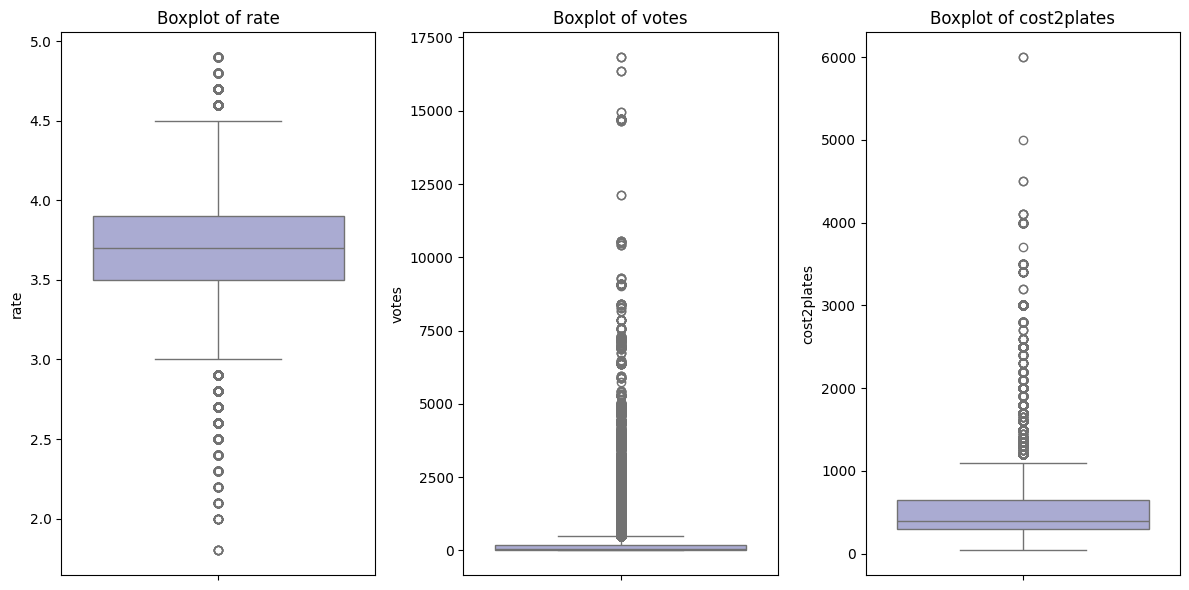

In [29]:

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
index = 0
axs = axs.flatten()

# Loop through numerical columns and create boxplots
for k in numerical_cols:
    sns.boxplot(y=k, data=df, ax=axs[index], color= '#A3A4D9')
    axs[index].set_title(f'Boxplot of {k}')  # Use axs[index].set_title
    index += 1

# Adjust layout
plt.tight_layout(h_pad=2)

plt.show()

# Handling Outliers in 'votes' column

In [30]:
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the median of the column
median_value = df['votes'].median()

# Replace outliers above the upper bound with the median
df['votes'] = np.where(df['votes'] > upper_bound, median_value, df['votes'])
df['votes']= df['votes'].astype(int)
print(df['votes'].max())

484


# Handling Outliers in 'cost2plates' column

In [31]:
Q1 = df['cost2plates'].quantile(0.25)
Q3 = df['cost2plates'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR


## Calculate the median of the column
median_value = df['cost2plates'].median()


# Replace outliers above the upper bound with the median
df['cost2plates'] = np.where(df['cost2plates'] > upper_bound, median_value, df['cost2plates'])
print(df['cost2plates'].max())

1100.0


# **Visualizing distributions, correlations, and patterns**

---



---



# Distribution of Restaurants by Location

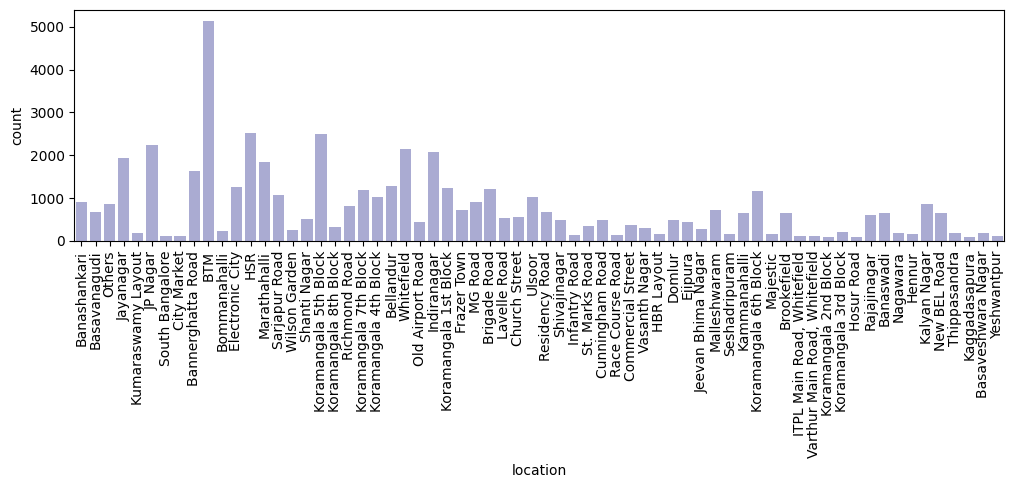

In [32]:
plt.figure(figsize=(12, 3))
sns.countplot(x="location", data=df, color= '#A3A4D9')
plt.xticks(rotation=90)
plt.show()

BTM has the highest number of restaurants, significantly more than any other location (~5000+).
HSR, Marathahalli, JP Nagar, and Koramangala 5th Block are other prominent areas with a high concentration of restaurants.
Koramangala appears multiple times (e.g., 5th, 6th, 7th Block), indicating it's a major food hub.
Locations like Basaveshwara Nagar, Kalyan Nagar, and Yeshwantpur have fewer restaurants.
The distribution is skewed, with a few areas dominating while most locations have much lower counts.

# Availability of Online Ordering and Table Booking



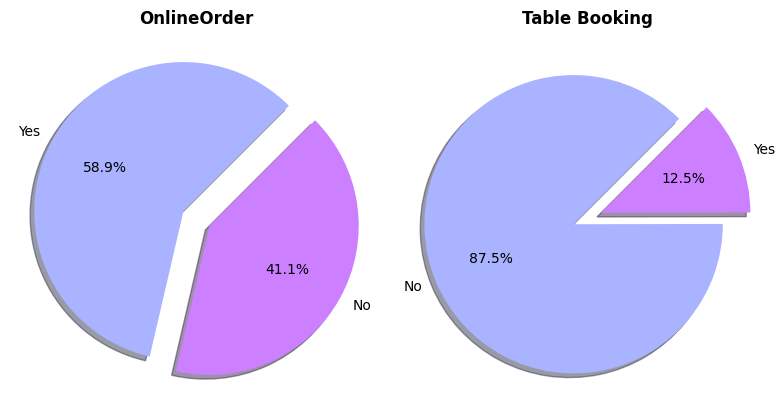

In [33]:
#Check for online order availability
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))



# Plot the first countplot for 'Online_Order'
online_order = df["online_order"].value_counts()
X= online_order.index
Y= online_order.values

plt.subplot(1,2,1)
plt.pie(Y,autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True,startangle=45,explode=[0.1, 0.1],labels=X)
plt.title('OnlineOrder', fontdict={'fontsize': 12},fontweight ='bold')

# Plot the second countplot for 'Book_Table'
book_table=df["book_table"].value_counts()
X= book_table.index
Y= book_table.values


plt.subplot(1,2,2)
plt.pie(Y,autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True,startangle=45,explode=[0.1, 0.1],labels=X)
plt.title('Table Booking', fontdict={'fontsize': 12},fontweight ='bold')

# Show the plots
plt.tight_layout()  # Adjust the spacing between plots
plt.show()

# Distribution of Restaurant Types

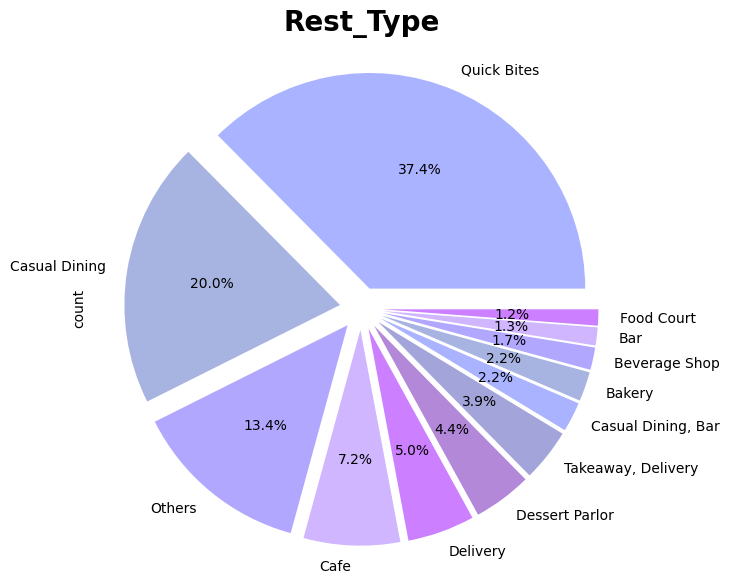

In [34]:
# Calculate the value counts of 'Rest_Type'
rest_type_counts = round(df['rest_type'].value_counts() / df.shape[0] * 100, 2)

# Generate 'explode' list based on the number of categories
explode_values = [0.1] * len(rest_type_counts)

# Plot the pie chart
plt.figure(figsize=(10, 7))
rest_type_counts.plot.pie(autopct='%1.1f%%', colors = ['#AAb3ff', '#A7B4E1', '#B2A7FF', '#D0B5FF', '#CC80FF', '#B388D8', '#A3A4D9']
, explode=explode_values)
plt.title('Rest_Type', fontdict={'fontsize': 20}, fontweight='bold')
plt.show()

# Distribution Number of Votes location wise

In [35]:
# Create a DataFrame with Location and Votes columns
location_votes_df = df[['location', 'votes']]

# Group by Location and sum the Votes
total_votes_by_location = location_votes_df.groupby(['location'])['votes'].sum()

# Convert to a DataFrame and sort by Votes
total_votes_by_location = total_votes_by_location.to_frame()
total_votes_by_location = total_votes_by_location.sort_values('votes', ascending=False)

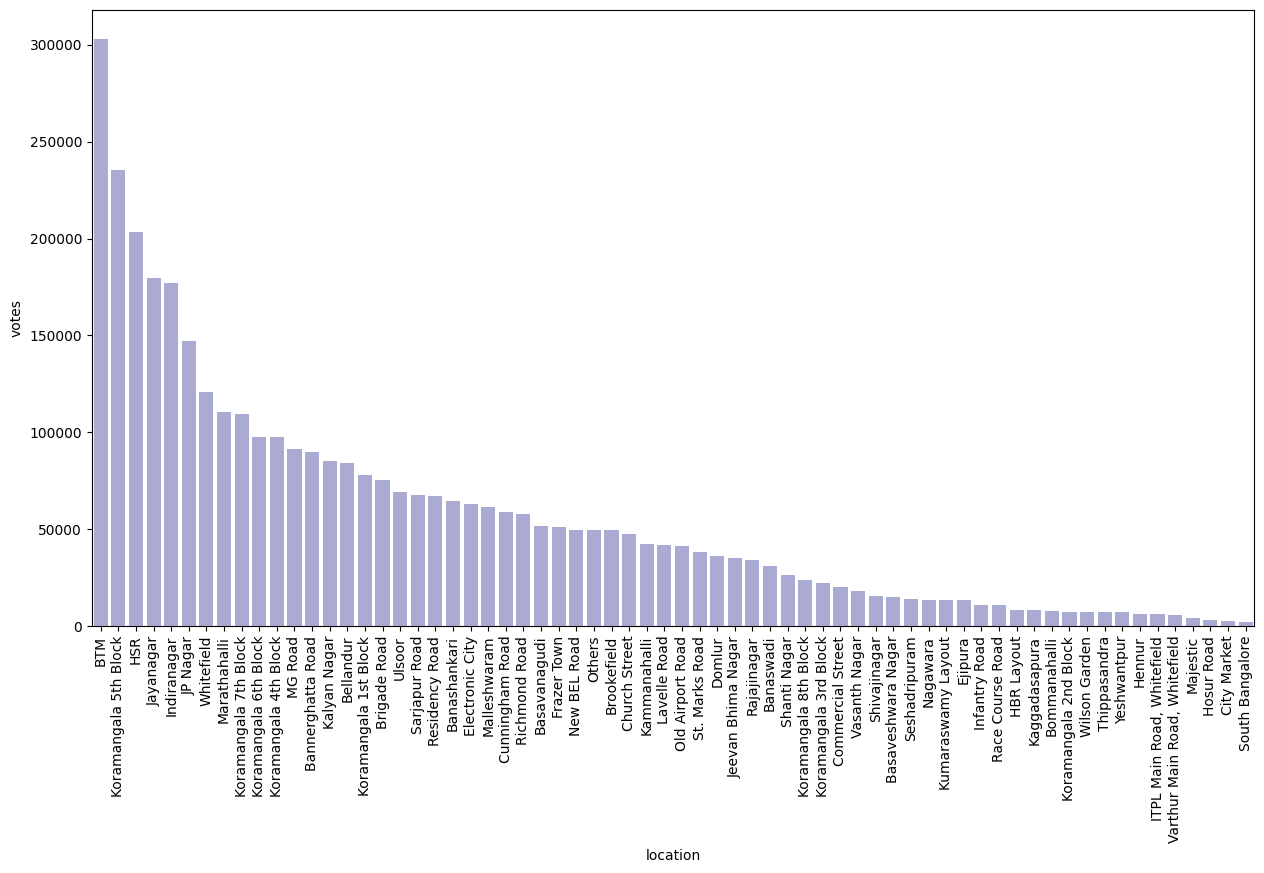

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x= total_votes_by_location.index, y=total_votes_by_location ['votes'], color = '#A3A4D9' )
plt.xticks(rotation = 90)
plt.show()

# Distribution of Restaurant Categories by Location

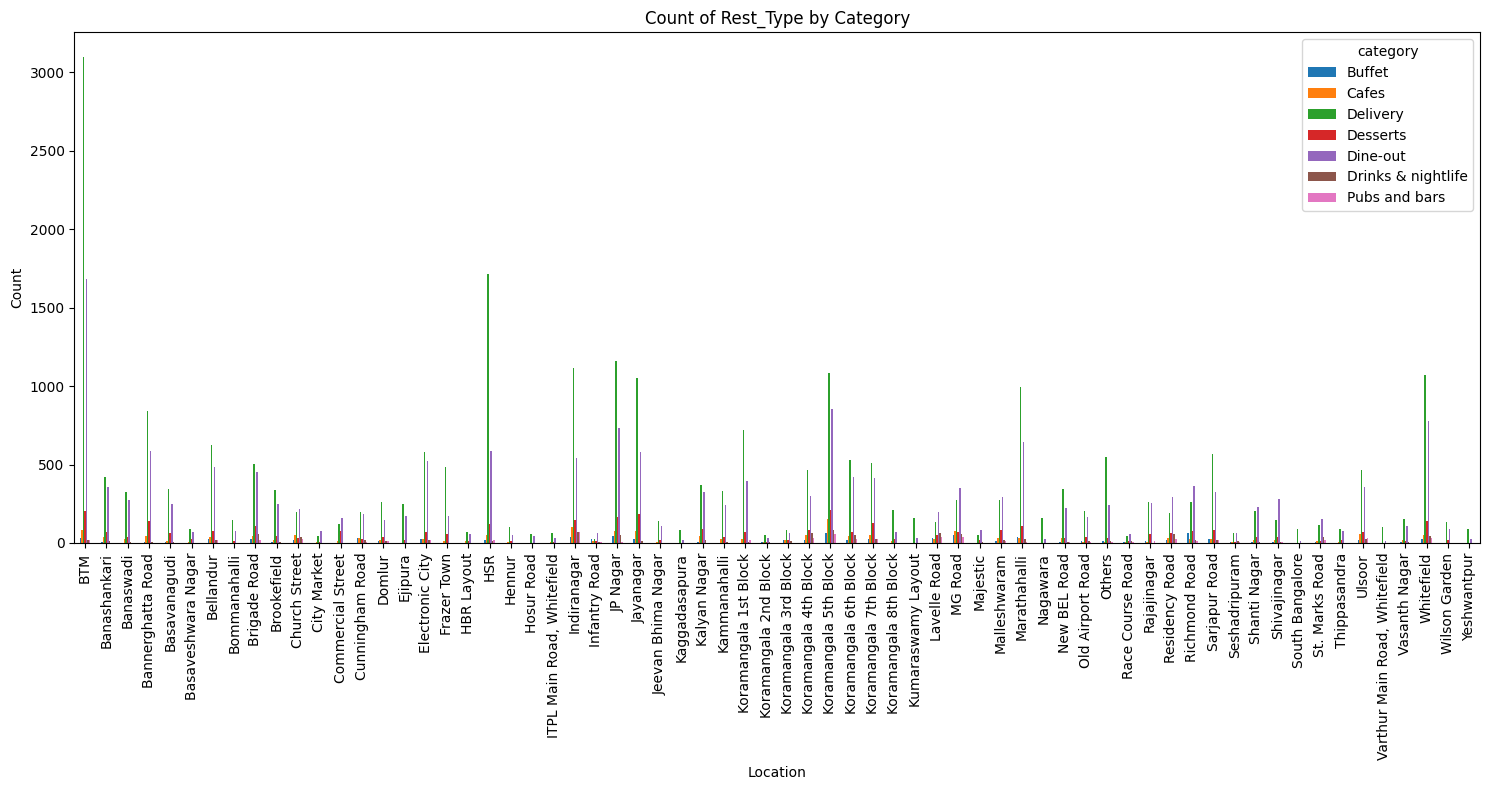

In [37]:
df2 = df.groupby('location')['category'].value_counts().reset_index(name='Count')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
df2.pivot(index='location', columns='category', values='Count').plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Rest_Type by Category')

# Show the plot
plt.tight_layout()
plt.show()

# Visualizing Restaurant Categories vs Ratings

<Figure size 1200x600 with 0 Axes>

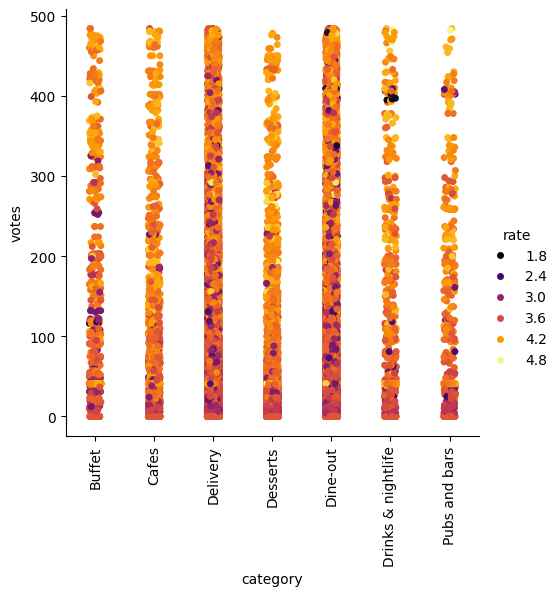

In [38]:
plt.figure(figsize = (12, 6))
sns.catplot(x = 'category', y = 'votes', hue = 'rate', data = df, palette = 'inferno',  )
plt.xticks(rotation = 90)
plt.show()

# Distribution of Restaurant Types Across Categories

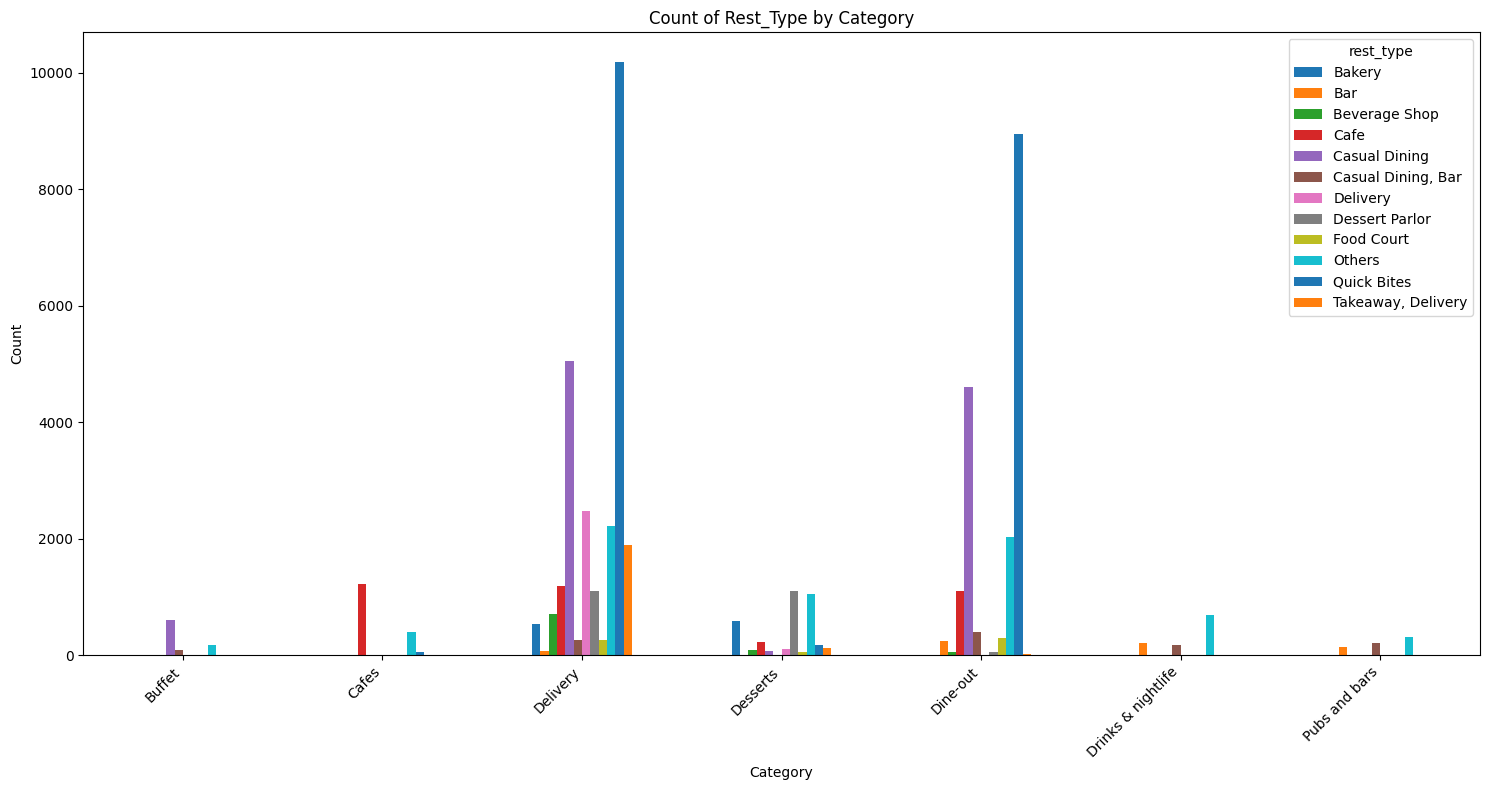

In [39]:
# Group by 'Category' and 'Rest_Type' and count occurrences
category_rest_type_counts = df.groupby('category')['rest_type'].value_counts().reset_index(name='Count')

# Pivot the data for plotting
pivot_rest_type_counts = category_rest_type_counts.pivot(index='category', columns='rest_type', values='Count').fillna(0)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
pivot_rest_type_counts.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Rest_Type by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Distribution of Restaurant Ratings

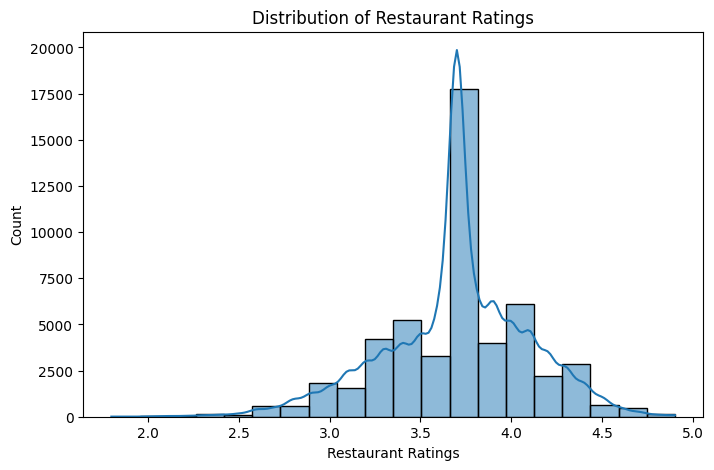

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.xlabel("Restaurant Ratings")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Ratings")
plt.show()

# Exporting DataFrame to CSV

In [41]:
import os

# Create the directory if it doesn't exist
os.makedirs("/content/working", exist_ok=True)

# Now you can save the DataFrame to CSV
df.to_csv("/content/working/zomato_cleaned_data.csv", index=False)

### **Moving to Model Training**

---



---



In [42]:

# Basic Import
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings

In [43]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines,available
0,jalsa,Yes,Yes,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine,Available
1,spice elephant,Yes,No,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine,Not Available
2,san churro cafe,Yes,No,3.8,41,Banashankari,Others,800.0,Buffet,Western Cuisine,Not Available
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine,Available
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine,Available


# Number of Restaurants with Ratings ≤ 3.0

In [44]:
df[df['rate'] < 3.0].shape[0]

2257

# **Preparing X and Y variables**

---



In [45]:
X = df.drop(['rate'], axis = 1)
y = df['rate']


# **Train Test Split**

---



In [46]:

# separate dataset into train and test
X_train_df, X_test_df, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train_df.shape, X_test_df.shape)

(41373, 10) (10344, 10)


# **Feature Scaling with StandardScaler**

---



In [47]:
numerical_columns = ["votes", "cost2plates"]
categorical_columns = ["name", "location","category", "rest_type","online_order", "book_table", "grouped_cuisines", ]

# Numerical pipeline (Standard Scaler)
num_pipeline = Pipeline(steps=[("scaler", StandardScaler())])

# Categorical pipeline (One Hot Encoder and Standard Scaler)
cat_pipeline = Pipeline(steps=[
("one_hot_encoder", OneHotEncoder(handle_unknown='ignore')),
("scaler", StandardScaler(with_mean=False))
])


# Column transformer applying the pipelines
preprocessor = ColumnTransformer(
transformers=[("num_pipeline", num_pipeline, numerical_columns),
              ("cat_pipeline", cat_pipeline, categorical_columns)
                ])

In [48]:
X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 92696 stored elements and shape (10344, 8531)>

# **Model Evaluation & Metrics**

In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [50]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
}

model_list = []
r2_list = []
best_model_name = None
best_model_r2 = -float('inf')
best_model_pred = None

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    # Track the best model based on R2 score
    if model_test_r2 > best_model_r2:
        best_model_r2 = model_test_r2
        best_model_name = list(models.keys())[i]
        best_model_pred = y_test_pred

    print('=' * 35)
    print('\n')
    print(f"The best model is: {best_model_name} with R2 score of {best_model_r2:.4f}")
print("Predictions of the best model:")
print(best_model_pred)

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0380
- Mean Absolute Error: 0.0145
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0920
- Mean Absolute Error: 0.0347
- R2 Score: 0.9457


The best model is: Random Forest Regressor with R2 score of 0.9457
Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0139
- Mean Absolute Error: 0.0024
- R2 Score: 0.9988
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0923
- Mean Absolute Error: 0.0219
- R2 Score: 0.9454


The best model is: Random Forest Regressor with R2 score of 0.9457
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1424
- Mean Absolute Error: 0.0755
- R2 Score: 0.8703
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1903
- Mean Absolute Error: 0.1084
- R2 Score: 0.7679



# **Results**

---



In [51]:

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Random Forest Regressor,0.945713
1,Decision Tree,0.945389
2,K-Neighbors Regressor,0.767893


# **Plot y_pred and best_model_pred**

---



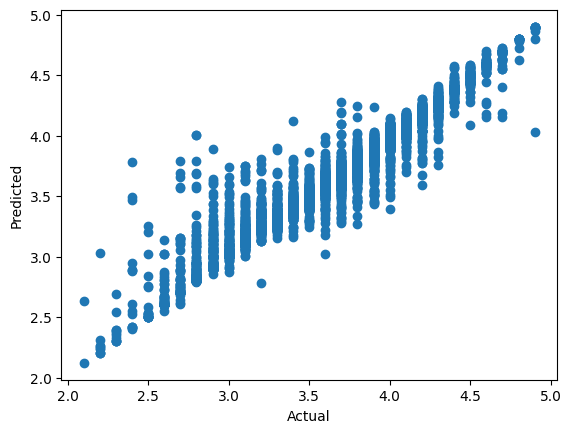

In [52]:
plt.scatter(y_test,best_model_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

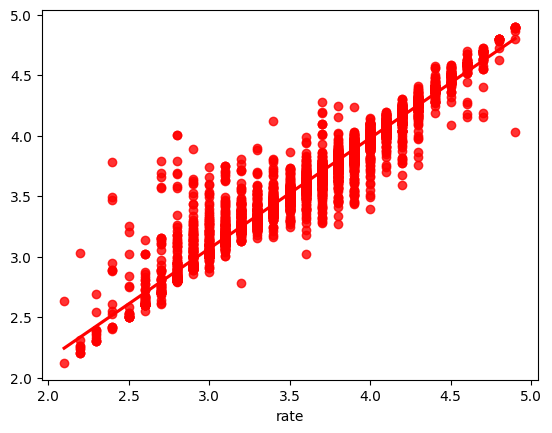

In [53]:

sns.regplot(x=y_test, y=best_model_pred, ci=None, color ='red');


# **Actual vs. Predicted Values**

In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':best_model_pred, 'Difference':y_test-best_model_pred})
pred_df['Index'] = range(0, len(pred_df))
#pred_df.sample(20)
pred_df[pred_df['Actual Value'] > 3]

,Actual Value,Predicted Value,Difference,Index
8440,3.9,3.90100,-1.000000e-03,0
16711,3.8,3.79100,9.000000e-03,2
42588,3.5,3.49400,6.000000e-03,3
5266,3.5,3.48326,1.673968e-02,4
24663,3.2,3.24200,-4.200000e-02,5
...,...,...,...,...
49217,4.1,3.91100,1.890000e-01,10339
39524,4.0,4.01100,-1.100000e-02,10340
47849,3.1,3.10300,-3.000000e-03,10341
30475,3.7,3.70000,7.105427e-15,10342


In [55]:
table_row = X_test_df.iloc[[10343]]

preprocessed_row = preprocessor.transform(table_row)

prediction = models[best_model_name].predict(preprocessed_row)

print(f"The prediction for the given row is: {prediction[0]:.2f}")

The prediction for the given row is: 3.31


# **Conclusion**

---



*Random Forest is the best choice due to its balance between training and test performance.

*Decision Tree may be slightly overfitting, but it still performs well.

*KNN is not an effective model for this dataset and may need tuning or replacement.

*The dataset is imbalanced, with only 4.36% of restaurants having a rating of below 3.0. This could lead to bias in the model, where it performs well on the majority class (higher-rated restaurants) but struggles with underrepresented low ratings. To improve model generalization, techniques like resampling, class weighting, or adjusting evaluation metrics (e.g., RMSE, MAE) should be considered.

In [56]:
!pip install firebase-admin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [57]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
from tqdm import tqdm  # Pour une barre de progression
import time

In [58]:

#  Initialisation Firebase
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/drive/MyDrive/angularproject-14f34-firebase-adminsdk-fbsvc-587fca2ffa.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://angularproject-14f34-default-rtdb.firebaseio.com/'
    })

In [59]:
# Références Firebase
reservations_ref = db.reference('/reservations')
pending_ref = db.reference('/reservations_pending')
processed_ref = db.reference('/reservations_processed')

In [60]:
# Check if the default app is already initialized
#if not firebase_admin._apps:
    # Chemin vers le fichier JSON de ton compte de service
 #   cred = credentials.Certificate("/content/drive/MyDrive/angularproject-14f34-firebase-adminsdk-fbsvc-587fca2ffa.json")

    # Initialise l'app Firebase
  #  firebase_admin.initialize_app(cred, {
   #     'databaseURL': 'https://angularproject-14f34-default-rtdb.firebaseio.com/'  # ton URL Realtime Database
    #})
#else:
  ## print("Firebase app is already initialized.")

In [61]:
# 2. Référence à votre noeud Firebase
ref = db.reference('restaurants_cleaned_data')

In [62]:
# 3. Conversion du DataFrame en dictionnaire
data = df.to_dict(orient='records')

In [63]:
# Récupération des données pour vérification
saved_data = ref.get()
print(f"Nombre d'enregistrements dans Firebase: {len(saved_data) if saved_data else 0}")


Nombre d'enregistrements dans Firebase: 51717


In [64]:
# Conversion en DataFrame pour inspection
firebase_df = pd.DataFrame(saved_data).transpose() if saved_data else pd.DataFrame()
print(firebase_df.head())

                                 0                     1                2      \
available                    Available         Not Available    Not Available   
book_table                         Yes                    No               No   
category                        Buffet                Buffet           Buffet   
cost2plates                      800.0                 800.0            800.0   
grouped_cuisines  North Indian Cuisine  North Indian Cuisine  Western Cuisine   

                                 3                     4      \
available                    Available             Available   
book_table                          No                    No   
category                        Buffet                Buffet   
cost2plates                      300.0                 600.0   
grouped_cuisines  North Indian Cuisine  North Indian Cuisine   

                                 5                     6                7      \
available                    Available         

In [65]:
# Define the recommendation data
#ecommendation = {
  #  'restaurant_id': 'rest_A123',  # Replace with actual data
   # 'user_id': 'user_XYZ',        # Replace with actual data
    #'score': 4.5                # Replace with actual data
#}

# Sauvegarde dans Firebase
#ref = db.reference('/recommendations')
#ref.push(recommendation)

In [66]:
ref = db.reference('/reservations')
reservations = ref.get()
print(reservations)

{'-OPgSANm6cbJ3a52v8dI': {'date': '2025-05-16', 'name': 'Radhia Hamed', 'people': 1, 'phone': '23654119', 'restaurant': 'Non spécifié', 'table': 'Non spécifié', 'time': '00:34'}, '-OPq7JmqwWK1Mn_RYsjU': {'date': '2025-05-16', 'name': 'Radhia Hamed', 'people': 1, 'phone': '78965412', 'restaurant': 'El Kolla', 'table': '3', 'time': '20:41'}, '-OPqYdbKhCjAPX97pGX5': {'date': '2025-05-16', 'name': 'Radhia jj', 'people': 1, 'phone': '12345678', 'restaurant': 'La Voile Blanche', 'table': '5', 'time': '22:40'}, '-OPqaUw7BKiHNKNCDsDQ': {'date': '2025-05-15', 'name': 'Radhia Hamed', 'people': 3, 'phone': '12345678', 'restaurant': 'Trocadero Sfax', 'table': '8', 'time': '20:00'}}


In [67]:
ref = db.reference('/messages')
messages = ref.get()
print(messages)

{'-OKx6tmpoacswOglZhSy': {'email': 'radhiahamed187@gmail.com', 'name': 'radhia', 'phone': '23654119', 'review': "c'est un bon plan merci !!"}, '-OPbUZ50_8tFhsl6YpG0': {'email': 'radhiahamed187@gmail.com', 'name': 'Radhia Hamed', 'phone': '23654119', 'review': 'cc  '}, '-OQ346vXBRGs3LMS8mYO': {'email': 'radhiahamed187@gmail.com', 'name': 'Radhia Hamed', 'phone': '23654119', 'review': 'fffghjhjgf'}}


In [68]:
# Dans Colab, vérifiez que les données arrivent dans Firebase :
saved_data = ref.get()
print(saved_data)  # Doit afficher le même format que df.to_dict()

{'-OKx6tmpoacswOglZhSy': {'email': 'radhiahamed187@gmail.com', 'name': 'radhia', 'phone': '23654119', 'review': "c'est un bon plan merci !!"}, '-OPbUZ50_8tFhsl6YpG0': {'email': 'radhiahamed187@gmail.com', 'name': 'Radhia Hamed', 'phone': '23654119', 'review': 'cc  '}, '-OQ346vXBRGs3LMS8mYO': {'email': 'radhiahamed187@gmail.com', 'name': 'Radhia Hamed', 'phone': '23654119', 'review': 'fffghjhjgf'}}


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
# Load your dataframe
df = pd.read_csv("/content/working/zomato_cleaned_data.csv")  # Replace with your CSV file path
# Supposons que tu veux prédire si un resto est bien noté ou pas (rate > 3.5)
df['target'] = df['rate'].apply(lambda x: 1 if x > 3.5 else 0)

In [71]:
df = df.drop('rate', axis=1)

In [72]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [73]:
# 4. Séparation X (features) et y (target)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [74]:
# 5. Séparation des données en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# 6. Normalisation (optionnelle mais recommandée pour la régression logistique)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [76]:
# 7. Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [77]:
# 8. Prédiction
y_pred = model.predict(X_test)

In [78]:
# 9. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9305877803557618
Confusion Matrix:
 [[2342  437]
 [ 281 7284]]


In [79]:
# Exemple simple de modèle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X = df[['rate', 'cost2plates']]  # Ou tes vraies colonnes # 'rate' has been removed and is not in df
X = df[['votes', 'cost2plates']]  # Use existing numerical columns
y = df['online_order']  # Ex : cible binaire

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

import joblib
joblib.dump(model, 'model.pkl')  # Sauvegarde du modèle

['model.pkl']

In [80]:
import pandas as pd
import joblib

# Charger le modèle
model = joblib.load('model.pkl')

# Créer un DataFrame avec les bons noms de colonnes
new_data = pd.DataFrame([[250, 500]], columns=['votes', 'cost2plates'])

# Prédiction
prediction = model.predict(new_data)

print("Commande en ligne :", "Oui" if prediction[0] == 1 else "Non")


Commande en ligne : Non


In [81]:
!pip install Flask-Cors # Install the missing package


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [82]:
# Sauvegarder les données nettoyées au format JSON
df.to_json('/content/cleaned_data.json', orient='records')

# Sauvegarder au format CSV si besoin
df.to_csv('/content/cleaned_data.csv', index=False)


# ""

In [83]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
import time
from tqdm import tqdm  # Pour une barre de progression

# Initialisation Firebase sécurisée
def initialize_firebase():
    if not firebase_admin._apps:
        try:
            cred = credentials.Certificate("/content/drive/MyDrive/angularproject-14f34-firebase-adminsdk-fbsvc-587fca2ffa.json")
            firebase_admin.initialize_app(cred, {
                'databaseURL': 'https://angularproject-14f34-default-rtdb.firebaseio.com/'
            })
            print("✓ Firebase initialisé avec succès")
            return True
        except Exception as e:
            print(f"✗ Erreur d'initialisation Firebase: {str(e)}")
            return False
    return True

# Fonction pour envoyer les données
def send_to_firebase(dataframe, node_name='restaurants', batch_size=100, delay=0.5):
    if not initialize_firebase():
        return False

    try:
        ref = db.reference(node_name)
        data = dataframe.to_dict(orient='records')
        total = len(data)

        print(f"\nEnvoi de {total} enregistrements vers Firebase...")

        for i in tqdm(range(0, total, batch_size)):
            batch = data[i:i + batch_size]

            # Crée un sous-nœud pour chaque restaurant avec un ID unique
            for record in batch:
                ref.push().set(record)

            time.sleep(delay)  # Délai pour éviter les limites de taux

        print("\n✓ Données envoyées avec succès")
        return True

    except Exception as e:
        print(f"\n✗ Erreur lors de l'envoi: {str(e)}")
        return False

# Fonction pour vérifier les données
def check_firebase_data(node_name='restaurants'):
    try:
        ref = db.reference(node_name)
        snapshot = ref.get()
        count = len(snapshot) if snapshot else 0
        print(f"\nFirebase contient {count} enregistrements dans le nœud '{node_name}'")
        return count
    except Exception as e:
        print(f"Erreur de vérification: {str(e)}")
        return 0

# --------------------------------------------------
# Exécution principale
# --------------------------------------------------

if __name__ == "__main__":
    # 1. Charger vos données
    df = pd.read_csv("/content/working/zomato_cleaned_data.csv")  # Adaptez le chemin

    # 2. Envoyer vers Firebase
    success = send_to_firebase(df, node_name='restaurants_v2', batch_size=50)

    # 3. Vérification
    if success:
        check_firebase_data('restaurants_v2')


Envoi de 51717 enregistrements vers Firebase...


100%|██████████| 1035/1035 [45:37<00:00,  2.64s/it]



✓ Données envoyées avec succès

Firebase contient 258585 enregistrements dans le nœud 'restaurants_v2'


In [85]:
 print("Données envoyées :", df.shape)
check_firebase_data('restaurants_v2')  # Doit retourner le même nombre

Données envoyées : (51717, 11)

Firebase contient 258585 enregistrements dans le nœud 'restaurants_v2'


258585

In [86]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
import json

In [87]:
#  Initialisation Firebase
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/drive/MyDrive/angularproject-14f34-firebase-adminsdk-fbsvc-587fca2ffa.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://angularproject-14f34-default-rtdb.firebaseio.com/'
    })

In [88]:
# Référence à votre noeud Firebase
ref = db.reference('restaurants')

In [89]:
# Conversion du DataFrame en dictionnaire
data = df.to_dict(orient='records')

In [90]:
 # Envoi des données par lots (Firebase a une limite de taille)
batch_size = 100
for i in range(0, len(data), batch_size):
    batch = data[i:i + batch_size]
    ref.push().set(batch)
    print(f"Envoi du lot {i//batch_size + 1}")

Envoi du lot 1
Envoi du lot 2
Envoi du lot 3
Envoi du lot 4
Envoi du lot 5
Envoi du lot 6
Envoi du lot 7
Envoi du lot 8
Envoi du lot 9
Envoi du lot 10
Envoi du lot 11
Envoi du lot 12
Envoi du lot 13
Envoi du lot 14
Envoi du lot 15
Envoi du lot 16
Envoi du lot 17
Envoi du lot 18
Envoi du lot 19
Envoi du lot 20
Envoi du lot 21
Envoi du lot 22
Envoi du lot 23
Envoi du lot 24
Envoi du lot 25
Envoi du lot 26
Envoi du lot 27
Envoi du lot 28
Envoi du lot 29
Envoi du lot 30
Envoi du lot 31
Envoi du lot 32
Envoi du lot 33
Envoi du lot 34
Envoi du lot 35
Envoi du lot 36
Envoi du lot 37
Envoi du lot 38
Envoi du lot 39
Envoi du lot 40
Envoi du lot 41
Envoi du lot 42
Envoi du lot 43
Envoi du lot 44
Envoi du lot 45
Envoi du lot 46
Envoi du lot 47
Envoi du lot 48
Envoi du lot 49
Envoi du lot 50
Envoi du lot 51
Envoi du lot 52
Envoi du lot 53
Envoi du lot 54
Envoi du lot 55
Envoi du lot 56
Envoi du lot 57
Envoi du lot 58
Envoi du lot 59
Envoi du lot 60
Envoi du lot 61
Envoi du lot 62
Envoi du lot 63
E

In [91]:
# Vérification
print("Données envoyées avec succès à Firebase")

Données envoyées avec succès à Firebase


In [92]:
import firebase_admin
from firebase_admin import credentials

def init_firebase():
    # Vérifie si Firebase est déjà initialisé
    if not firebase_admin._apps:
        try:
            cred = credentials.Certificate("/content/drive/MyDrive/angularproject-14f34-firebase-adminsdk-fbsvc-587fca2ffa.json")
            firebase_admin.initialize_app(cred, {
                'databaseURL': 'https://angularproject-14f34-default-rtdb.firebaseio.com/'
            })
            print("Firebase initialisé avec succès")
        except Exception as e:
            print(f"Erreur d'initialisation Firebase: {str(e)}")
    else:
        print("Firebase est déjà initialisé")

# Appel initial
init_firebase()

# Pour réinitialiser (si nécessaire)
def reset_firebase():
    for app in firebase_admin._apps:
        firebase_admin.delete_app(app)
    print("Toutes les instances Firebase ont été supprimées")

Firebase est déjà initialisé
